# Assessment of Hazardous Materials

According  to  the 2014CEQR  Technical  Manual,  the  potential  for  significant  adverse  impacts  from hazardous  materials  can occur  when:(a)  hazardous  materials  exist  on  a  site,  and  (b)  an  action  would increase pathways to their exposure; or (c) an action would introduce new activities or processes using hazardous materials.

In this notebook, I will start with assessing the current hazadous materials including PM2.5,SO2,NO and NO2 that exist in the project area. Then I'll evaluate if the proposed action would result in any significant adverse hazardours materials.

### Definition

As defined in the 2014CEQR Technical Manual, a hazardous material is any substance that poses a threat to human health or the environment.  Substances that can be of concern include, but are not limited to, heavy  metals,  volatile  and  semivolatile  organic  compounds,  methane,  polychlorinated  biphenyls  and hazardous  wastes  (defined  as  substances  that  are  chemically  reactive,  ignitable,  corrosive,  or  toxic).  


In [130]:
import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio
import rasterstats
from rasterio.mask import mask
from shapely.geometry import box

from fiona.crs import from_epsg
import pycrs

from rasterio.plot import show, show_hist
from rasterstats import point_query, zonal_stats
from IPython.display import Image

import urllib
#import mplleaflet as mpll
% pylab inline

Populating the interactive namespace from numpy and matplotlib


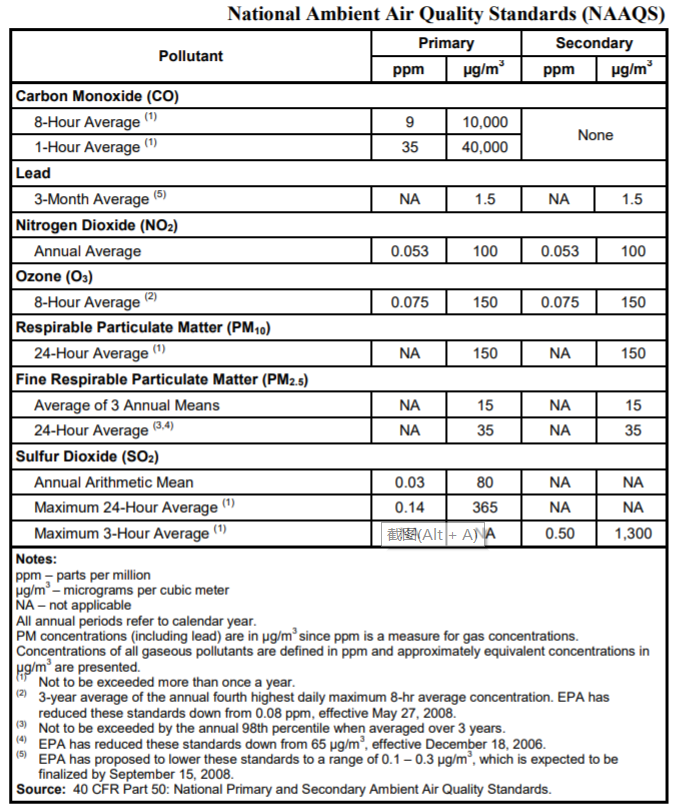

In [132]:
Image('data/Ambient-AirQuality-standards.png')

### Dataset

The pollution data are available as ESRI grid raster files at 300 m resolution reported in the New York Community Air Survey (NYCAS).

Here is the link:
https://data.cityofnewyork.us/Environment/NYCCAS-Air-Pollution-Rasters/q68s-8qxv


### PM2.5

In [5]:
raster_PM25 = rasterio.open("../airquality/aa8_pm300m//") #2016

(912815.3055, 1067303.3055, 119778.06540000002, 273282.0654)

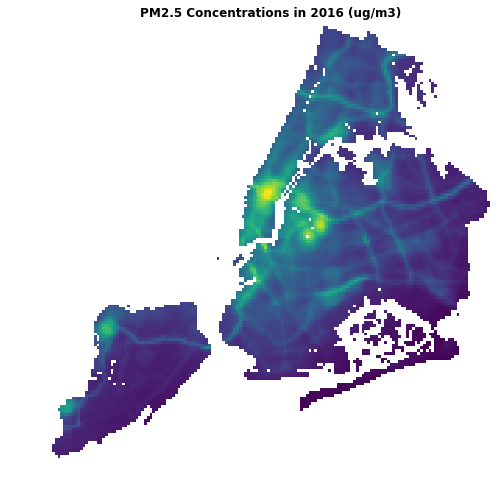

In [6]:
fid,ax = plt.subplots(figsize=[8,8])
rasterio.plot.show(raster_PM25,title='PM2.5 Concentrations in 2016 (ug/m3)',ax=ax)
ax.axis('off')

#### calculate the level of pm2.5  near footprint points within the study area

In [63]:
noisestudyarea= gpd.GeoDataFrame.from_file('noisestudyarea/redhook.shp')

In [2]:
#import the points
import zipfile
zip_ref = zipfile.ZipFile('data/studypoints.zip', 'r')
zip_ref.extractall('data/studypoints')
zip_ref.close()

In [8]:
footprintpoint = gpd.GeoDataFrame.from_file('data/studypoints/layers/POINT.shp')

In [10]:
footprintpoint.crs

{'init': u'epsg:4326'}

In [11]:
footprintpoint.to_crs(raster_PM25.crs,inplace=True)

In [12]:
from rasterstats import point_query

In [13]:
shp= 'data/studypoints/layers/POINT.shp'
rast = '../airquality/aa8_pm300m//'
footprintpoint['pm252016'] = point_query(footprintpoint['geometry'],rast)

In [37]:
pm25cleaned = footprintpoint[footprintpoint['pm252016']>0]

Text(0.5,1,'PM2.5 concentration map within study area')

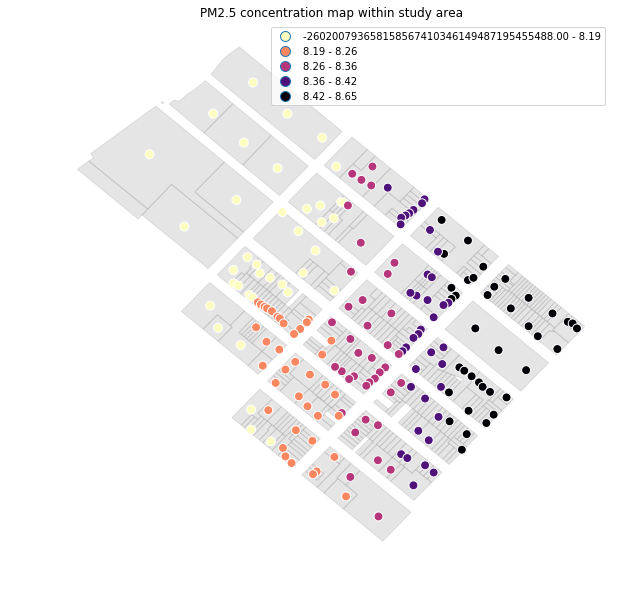

In [142]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
noisestudyarea.plot(ax=ax,color='grey',edgecolor='grey',alpha=0.2)
footprintpoint.plot(column='pm252016',cmap='magma_r',legend=True,scheme='quantiles',k=5,ax=ax,edgecolor='white',markersize=80)
ax.axis('off')
ax.set_title('PM2.5 concentration map within study area')

Text(0.5,1,'Histgram of PM2.5 whithin study area')

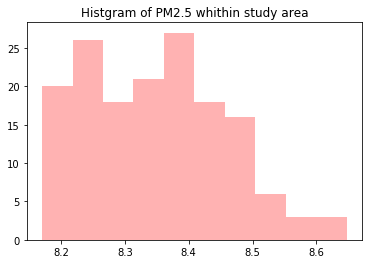

In [78]:
plt.hist(pm25cleaned['pm252016'],color='red',alpha=0.3)
plt.title('Histgram of PM2.5 whithin study area')

In [149]:
pm25cleaned['pm252016'].describe()

count    158.000000
mean       8.348819
std        0.107966
min        8.170708
25%        8.254981
50%        8.348532
75%        8.418919
max        8.647003
Name: pm252016, dtype: float64

In the study area, Pm2.5 concentrations are generally low with an average level of 8.34 un/m3. There is  none area with a level of pm2.5 greater than 10.The highest concentration was 8.17 ug/m3 in the east.According to the national ambient air quality standards, pm2.5 in the study area could meet the primary standard.


### NO2

In [9]:
raster_NO2= rasterio.open("../airquality/data/aa8_no2300m//") #2016

(912815.305467, 1067303.305467, 119778.06538499997, 273282.06538499997)

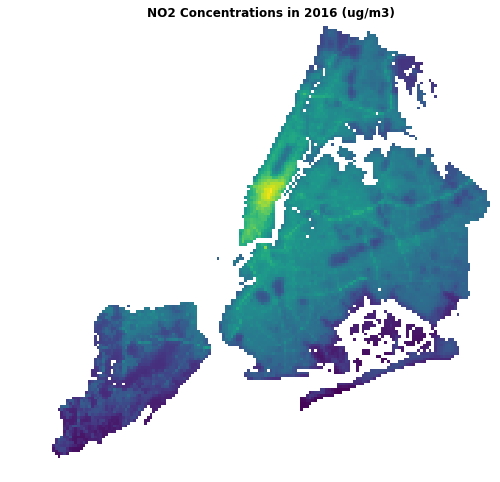

In [14]:
fid,ax = plt.subplots(figsize=[8,8])
rasterio.plot.show(raster_NO2,title='NO2 Concentrations in 2016 (ug/m3)',ax=ax)
ax.axis('off')

In [35]:
shp= 'data/studypoints/layers/POINT.shp'
rast = '../airquality/data/aa8_no2300m//'
footprintpoint['no252016'] = point_query(footprintpoint['geometry'],rast)

In [36]:
no2cleaned = footprintpoint[footprintpoint['no252016']>0]

Text(0.5,1,'NO2(ppb) concentration map within study area')

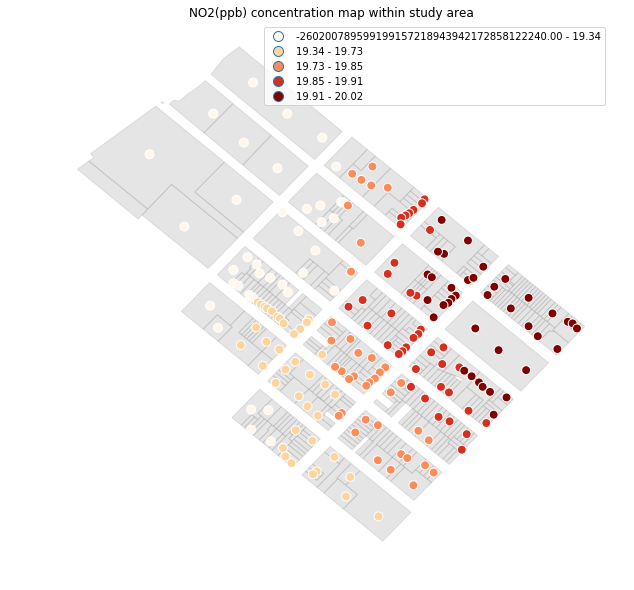

In [141]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
noisestudyarea.plot(ax=ax,color='grey',edgecolor='grey',alpha=0.2)
footprintpoint.plot(column='no252016',cmap='OrRd',legend=True,scheme='quantiles',k=5,ax=ax,edgecolor='white',markersize=80)
ax.axis('off')
ax.set_title('NO2(ppb) concentration map within study area')

Text(0.5,1,'Histgram of NO2(ppb) whithin study area')

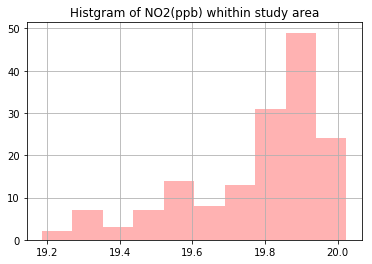

In [105]:
no2cleaned.hist('no252016',color='red',alpha=0.3)
plt.title('Histgram of NO2(ppb) whithin study area')

In [148]:
no2cleaned['no252016'].describe()

count    158.000000
mean      19.776082
std        0.191107
min       19.186402
25%       19.686070
50%       19.835077
75%       19.912173
max       20.023950
Name: no252016, dtype: float64

The NO2 level in the study area ranges from 19.18 to 20.02 parts per million. It's at an average level of 19.77 parts permillion which is much lower than the standards. 

### NO

(912815.305467, 1067303.305467, 119778.06538499997, 273282.06538499997)

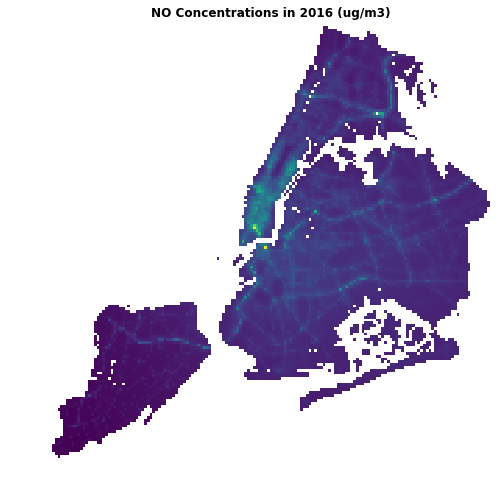

In [15]:
raster_NO= rasterio.open("../airquality/data/aa8_no300m//") #2016
fid,ax = plt.subplots(figsize=[8,8])
rasterio.plot.show(raster_NO,title='NO Concentrations in 2016 (ug/m3)',ax=ax)
ax.axis('off')

In [107]:
shp= 'data/studypoints/layers/POINT.shp'
rast = '../airquality/data/aa8_no300m//'
footprintpoint['no2016'] = point_query(footprintpoint['geometry'],rast)

In [108]:
nocleaned = footprintpoint[footprintpoint['no2016']>0]

Text(0.5,1,'NO(ppb) concentration map within study area')

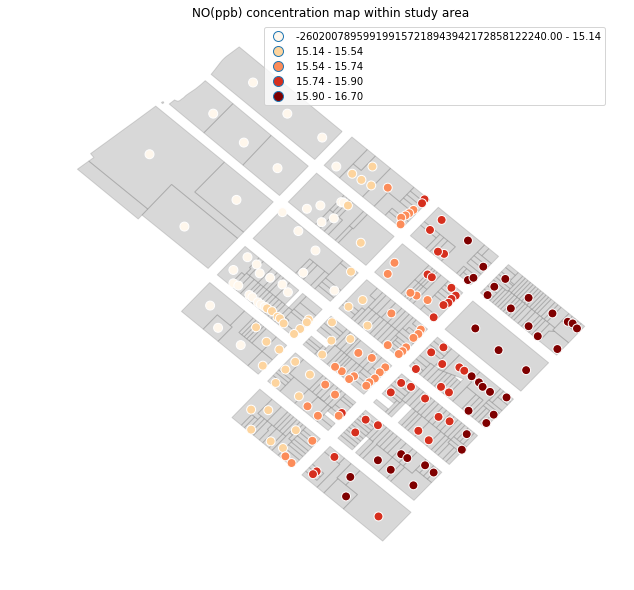

In [143]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
noisestudyarea.plot(column='LandUse',ax=ax,color='grey',edgecolor='grey',alpha=0.3)
footprintpoint.plot(column='no2016',cmap='OrRd',legend=True,scheme='quantiles',k=5,ax=ax,edgecolor='white',markersize=80)
ax.axis('off')
ax.set_title('NO(ppb) concentration map within study area')

Text(0.5,1,'Histgram of NO(ppb) whithin study area')

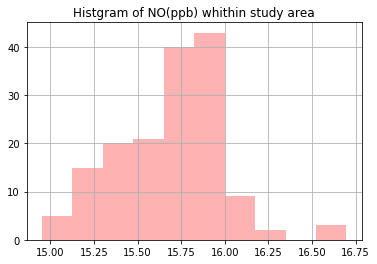

In [153]:
nocleaned.hist('no2016',color='red',alpha=0.3)
plt.title('Histgram of NO(ppb) whithin study area')

In [155]:
nocleaned['no2016'].describe()

count    158.000000
mean      15.690426
std        0.305409
min       14.951852
25%       15.478519
50%       15.726475
75%       15.896525
max       16.697737
Name: no2016, dtype: float64

The NO level in the study area ranges from 14.9 to 16.69 parts per million. It's at an average level of 15.69 parts permillion.

### SO2

(912815.305467, 1067303.305467, 119778.06538499997, 273282.06538499997)

/nfshome/jz3309/.conda/envs/myEnv/lib/python2.7/site-packages/matplotlib/image.py:429: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / 0.8)


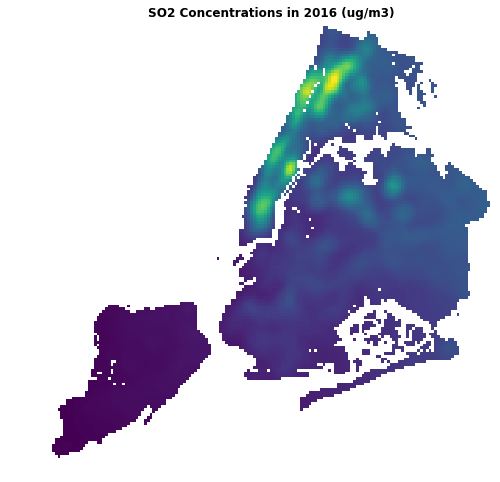

In [19]:
raster_SO2= rasterio.open("../airquality/data/w8_so2300m//") #2016
fid,ax = plt.subplots(figsize=[8,8])
rasterio.plot.show(raster_SO2,title='SO2 Concentrations in 2016 (ug/m3)',ax=ax)
ax.axis('off')

In [111]:
shp= 'data/studypoints/layers/POINT.shp'
rast = '../airquality/data/w8_so2300m//'
footprintpoint['so22016'] = point_query(footprintpoint['geometry'],rast)

In [112]:
so2cleaned = footprintpoint[footprintpoint['so22016']>0]

Text(0.5,1,'SO2(ppb) concentration map within study area')

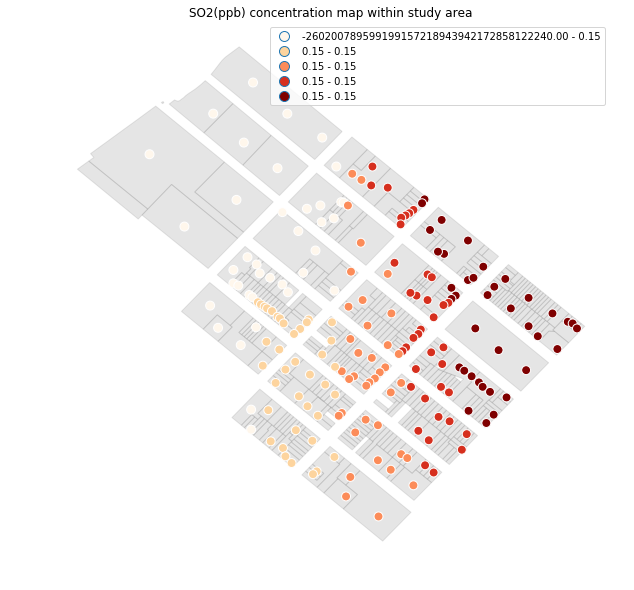

In [144]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
noisestudyarea.plot(ax=ax,color='grey',edgecolor='grey',alpha=0.2)
footprintpoint.plot(column='so22016',cmap='OrRd',legend=True,scheme='quantiles',k=5,ax=ax,edgecolor='white',markersize=80)
ax.axis('off')
ax.set_title('SO2(ppb) concentration map within study area')

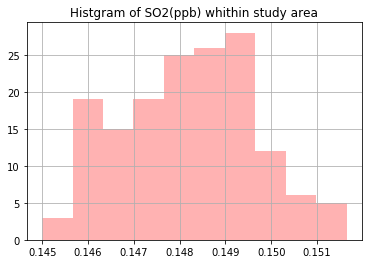

In [128]:
so2cleaned.hist('so22016',color='red',alpha=0.3)
plt.title('Histgram of SO2(ppb) whithin study area')

In [156]:
so2cleaned['so22016'].describe()

count    158.000000
mean       0.148186
std        0.001446
min        0.144997
25%        0.147179
50%        0.148314
75%        0.149205
max        0.151644
Name: so22016, dtype: float64

The SO2 level in the study area ranges from 0.14 to 0.15 parts per million. It's at an average level of 1.44 parts permillion which is much lower than the standards. SO2 level could meet the primary standard.

### O3

(913257.305467, 1067745.305467, 120000.06538499997, 272520.06538499997)

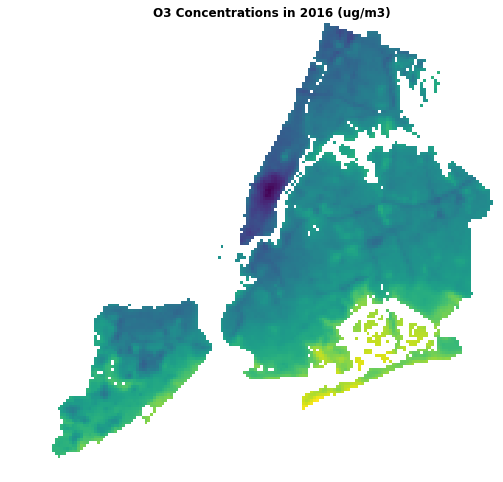

In [159]:
raster_o3= rasterio.open("../airquality/data/s7_o3300m//") #2016
fid,ax = plt.subplots(figsize=[8,8])
rasterio.plot.show(raster_o3,title='O3 Concentrations in 2016 (ug/m3)',ax=ax)
ax.axis('off')

In [160]:
shp= 'data/studypoints/layers/POINT.shp'
rast = '../airquality/data/s7_o3300m//'
footprintpoint['o32016'] = point_query(footprintpoint['geometry'],rast)

In [163]:
o3cleaned = footprintpoint[footprintpoint['o32016']>0]

Text(0.5,1,'O3(ppb) concentration map within study area')

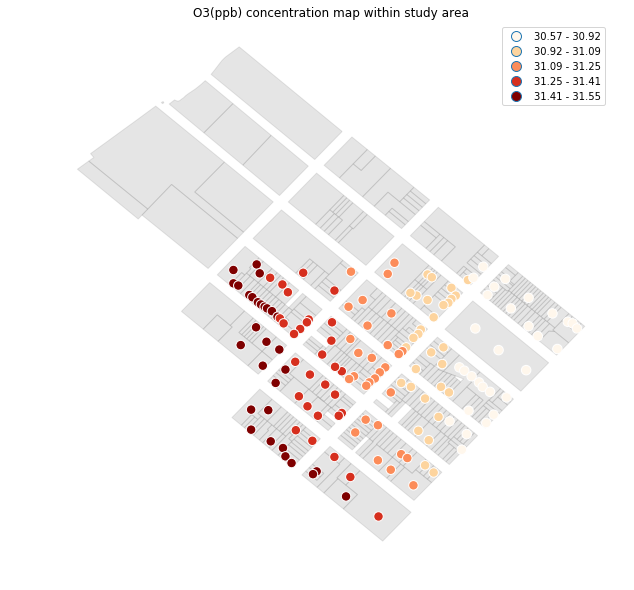

In [167]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
noisestudyarea.plot(ax=ax,color='grey',edgecolor='grey',alpha=0.2)
o3cleaned.plot(column='o32016',cmap='OrRd',legend=True,scheme='quantiles',k=5,ax=ax,edgecolor='white',markersize=90)
ax.axis('off')
ax.set_title('O3(ppb) concentration map within study area')

Text(0.5,1,'Histgram of O3(ppb) whithin study area')

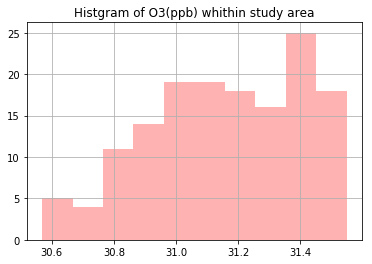

In [169]:
o3cleaned.hist('o32016',color='red',alpha=0.3)
plt.title('Histgram of O3(ppb) whithin study area')

In [170]:
o3cleaned['o32016'].describe()

count    149.000000
mean      31.155525
std        0.245866
min       30.569037
25%       30.972939
50%       31.173992
75%       31.384254
max       31.548271
Name: o32016, dtype: float64

The O3 level in the study area ranges from 30.57 to 31.54 parts per million whcih are lower than the standards(75ppb).

The concentration of hazardous gas in the study area is generally low, which could all reach the national ambient air quality standards.But further research should  into the concentration of toxic and hazardous gases on the roads as well

For further reseach, I would focus on the mobile source impacts to examine that if the trips generated by the projects would have potential to result in significant adverse mobile source impacts.
